## ERDAP with erddapy example for ITAE Prawler - 2017 M2 (BSITAE)

Profiles prior to 2017-09-15 04:15:00 (profile 1659) are processed through the RUDICS system
Profiles after are post processed by S.Bell via this [notebook](17BSITAEPR_rudics_process.ipynb)

__pyversion__==3.6   
__author__==S.Bell

In [2]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2019-09-26 15:45:48.263195


### connecting and basic information

In [3]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [4]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='PRAWLER'))

In [5]:
'We have {} tabledap, {} griddap, and {} wms endpoints.'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
)

'We have 11 tabledap, 0 griddap, and 0 wms endpoints.'

In [6]:
prawlers = df['Dataset ID'].values
print(prawlers)

['erddap_4fd3_fb30_b89f' 'erddap_17bsitae_prawler'
 'erddap_17ckitaem2a_prawler' 'erddap_18bsitaepr2a_prawler'
 'erddap_18mtitaepr1a_prawler' 'erddap_19bsitaepr2a_prawler'
 'erddap_19CKitaepr2a_prawler' 'erddap_17ckitaem2a_met'
 'erddap_18bsitaepr2a_met' 'erddap_18mtitaepr1a_met'
 'erddap_19bsitaepr2a_met']


In [7]:
variables = [e.get_var_by_attr(dataset_id=prawler, standard_name=lambda v: v is not None) for prawler in prawlers]
print(variables)

[['latitude', 'longitude', 'time', 'Chlorophyll', 'depth', 'Salinity'], ['latitude', 'longitude', 'time', 'Chlorophyll', 'depth', 'Salinity'], ['latitude', 'longitude', 'Oxy_Conc', 'Oxy_Temperature', 'Turbidity', 'time', 'Chlorophyll', 'depth', 'Salinity', 'SigmaT', 'Temperature', 'Oxy_Sat'], ['latitude', 'longitude', 'time', 'Chlorophyll', 'depth', 'Salinity'], ['latitude', 'longitude', 'time', 'Chlorophyll', 'depth', 'Salinity'], ['latitude', 'longitude', 'time', 'Chlorophyll', 'depth', 'Salinity'], ['latitude', 'longitude', 'time', 'Chlorophyll', 'depth', 'Salinity'], ['eastward_wind', 'latitude', 'wind_speed', 'longitude', 'northward_wind', 'air_pressure', 'relative_humidity', 'air_temperature', 'wind_from_direction', 'time'], ['eastward_wind', 'latitude', 'wind_speed', 'longitude', 'northward_wind', 'air_pressure', 'relative_humidity', 'air_temperature', 'wind_from_direction', 'time'], ['eastward_wind', 'latitude', 'wind_speed', 'longitude', 'northward_wind', 'air_pressure', 'rela

### retrieving and plotting data

In [8]:
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='erddap_17bsitae_prawler'

d.variables =  [
 'profileid',
 'Temperature',
 'Salinity',
 'Chlorophyll',
 'latitude',
 'longitude',
 'depth',
 'time',
 'Oxy_Conc',
 'Oxy_Sat'
]

d.constraints = {
    'time>=': '2017-01-01T00:00:00Z',
    'time<=': '2017-10-10T00:00:00Z',
    'latitude>=': 45,
    'latitude<=': 90,
    'longitude>=': 180,
    'longitude<=': 210
}

start_date = '2017-04-15'
end_date = '2017-10-01'

In [9]:
d.get_download_url()

'http://downdraft.pmel.noaa.gov:8080/erddap/tabledap/erddap_17bsitae_prawler.csv?profileid,Temperature,Salinity,Chlorophyll,latitude,longitude,depth,time,Oxy_Conc,Oxy_Sat&time>=1483228800.0&time<=1507593600.0&latitude>=45&latitude<=90&longitude>=180&longitude<=210'

In [10]:
df = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.sort_index(inplace=True)
df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

df.head()

,profileid,Temperature,Salinity,Chlorophyll,latitude,longitude,depth,Oxy_Conc,Oxy_Sat
time (UTC),,,,,,,,,
2017-04-28 00:15:00+00:00,17bsitae_p0003,1.246,31.585,0.216,56.863998,195.947006,5.5,436.34778,129.31284
2017-04-28 00:15:00+00:00,17bsitae_p0003,1.229,31.594,0.264,56.863998,195.947006,5.6,436.65887,129.35873
2017-04-28 00:15:00+00:00,17bsitae_p0003,1.217,31.597,0.264,56.863998,195.947006,5.6,437.11060,129.45613
2017-04-28 00:15:00+00:00,17bsitae_p0003,1.202,31.596,0.252,56.863998,195.947006,5.6,437.30610,129.46324
2017-04-28 00:15:00+00:00,17bsitae_p0003,1.175,31.601,0.300,56.863998,195.947006,5.5,437.69055,129.49301


In [11]:
df.tail()

,profileid,Temperature,Salinity,Chlorophyll,latitude,longitude,depth,Oxy_Conc,Oxy_Sat
time (UTC),,,,,,,,,
2017-09-23 20:16:01+00:00,17bsitae_p1763,2.0823,31.933247,0.1506,56.863998,195.947006,43.65,237.91641,72.24242
2017-09-23 20:16:09+00:00,17bsitae_p1763,2.0830,31.928127,0.1506,56.863998,195.947006,44.48,237.04959,71.97764
2017-09-23 20:16:17+00:00,17bsitae_p1763,2.0834,31.928944,0.1757,56.863998,195.947006,45.67,236.39664,71.78098
2017-09-23 20:16:25+00:00,17bsitae_p1763,2.0784,31.926977,0.2510,56.863998,195.947006,47.16,235.56505,71.51880
2017-09-23 20:16:33+00:00,17bsitae_p1763,2.0797,31.926650,0.2510,56.863998,195.947006,48.33,234.91823,71.32494


In [12]:
#qc
df['Temperature'][df['Temperature']>20]=np.nan

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean

import matplotlib as mpl
import matplotlib.pyplot as plt

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


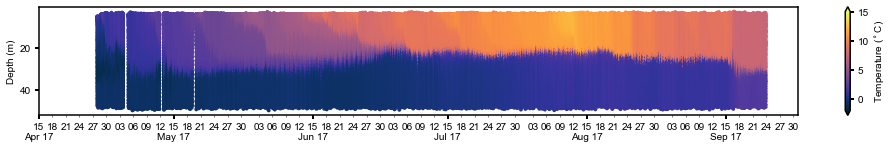

In [14]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Temperature'], vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)

ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [15]:
print("""
max temp: {0:0.4}
min temp: {1:0.4}""".format(df['Temperature'].max(), df['Temperature'].min()))


max temp: 12.43
min temp: -1.336


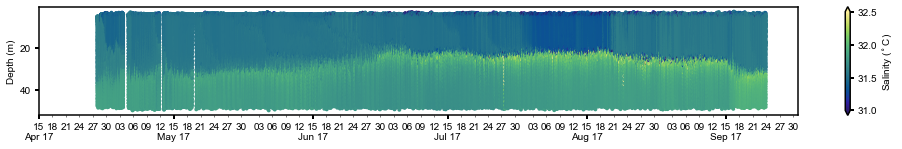

In [16]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Salinity'], marker='o', edgecolor='none', vmin=31, vmax=32.5, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [17]:
print("""
max sal: {0:0.4}
min sal: {1:0.4}""".format(df['Salinity'].max(), df['Salinity'].min()))


max sal: 35.7
min sal: 29.3


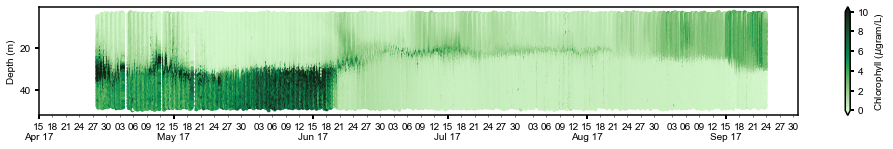

In [18]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Chlorophyll'], marker='o', edgecolor='none', vmin=0, vmax=10, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')
ax.set_ylabel('Depth (m)');

In [19]:
import seawater as sw
sigmat = sw.dens(s=df['Salinity'],t=df['Temperature'],p=df['depth']) - 1000.

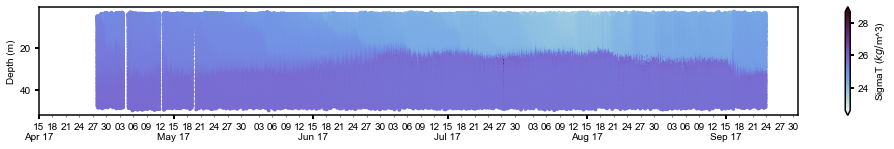

In [20]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=sigmat, marker='o', edgecolor='none', cmap=cmocean.cm.dense)

ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('SigmaT ($kg/$m^3)')
ax.set_ylabel('Depth (m)');

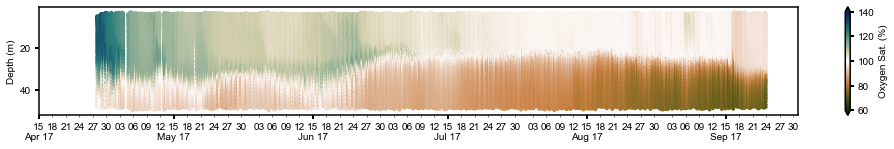

In [21]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Sat'], marker='o', vmin=60, vmax=140, edgecolor='none', cmap=cmocean.cm.tarn)

ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Sat. (%)')
ax.set_ylabel('Depth (m)');

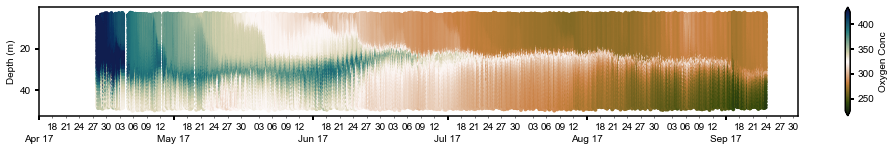

In [22]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Conc'], marker='o', vmin=225, vmax=425, edgecolor='none', cmap=cmocean.cm.tarn)

ax.invert_yaxis()
ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Conc')
ax.set_ylabel('Depth (m)');

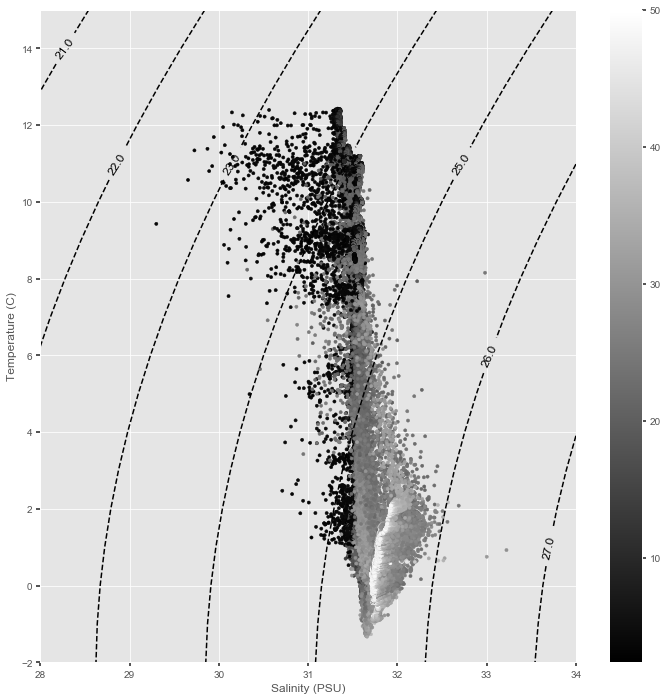

In [23]:
def plot_salvtemp(salt, temp, press, srange=[28,34], trange=[-2,15], ptitle=""): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig = plt.figure(figsize=(12, 12))
    ax1 = fig.add_subplot(111)
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    plt.colorbar(ts )
    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
 
    ax1.set_xlabel('Salinity (PSU)')
    ax1.set_ylabel('Temperature (C)')

    
    t = fig.suptitle(ptitle, fontsize=12, fontweight='bold')
    t.set_y(1.08)
    return fig  

fig = plot_salvtemp(df['Salinity'],df['Temperature'],df['depth'])

### Bin data to calculate integrate heat proxy (depth averaged temperature)

Setup 1m bins:
- code below will make all data deeper than prawler missing, thus biasing the averages to the upper 40m-50m.  Shapes may likely stay the same if the column is mixed, but maginitudes will be less.

In [24]:
def depth_ave(param, print_values=False):
    dfint= df.groupby('profileid')

    fig, ax = plt.subplots(figsize=(17, 2))

    for i,cast in enumerate(dfint.groups):
        if dfint.get_group(cast)['depth'].std() > 1:
            #only use available data... bias towards prawler
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth'], dfint.get_group(cast)[param], right=np.nan, left=np.nan)
            cs = ax.scatter(dfint.get_group(cast).index[0], np.nanmean(IntTemp), s=15, c='g', marker='o', edgecolor='none')
            
            #extrapolate to top and bottom
            IntTemp = np.interp(np.arange(0,74,1),dfint.get_group(cast)['depth'], dfint.get_group(cast)[param])
            cs = ax.scatter(dfint.get_group(cast).index[0], np.nanmean(IntTemp), s=15, c='r', marker='o', edgecolor='none')
            
            if print_values:
                print("{0},{1}".format(dfint.get_group(cast).index[0], np.nanmean(IntTemp)))

        xfmt = mdates.DateFormatter('%d-%b')
        ax.xaxis.set_major_formatter(xfmt)

        ax.set_ylabel(param)
        ax.set_xlabel('Time (UTC)')  

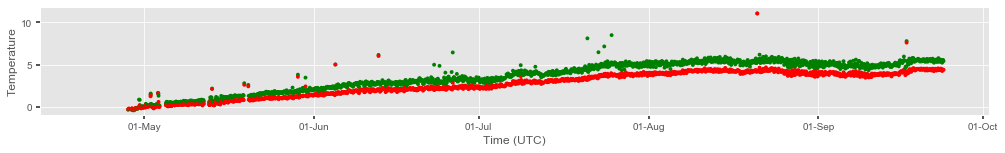

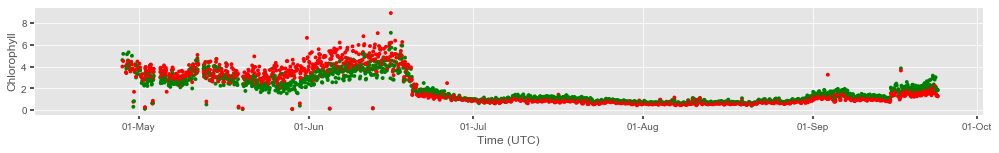

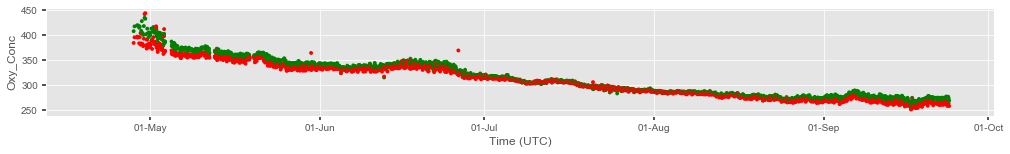

In [25]:
#depth averaged temp - interpolate to 1m bins before averaging
depth_ave('Temperature',print_values=False)
#depth averaged chlor - interpolate to 1m bins before averaging
depth_ave('Chlorophyll')
#depth averaged oxy - interpolate to 1m bins before averaging
depth_ave('Oxy_Conc')

- Above plots, red plots result from extrapolating the last point down to 73m (**73m historically when calculating ht content**), and up to the sfc then taking the mean.  Green points result from making all data below the prawler and above the prawler, "missing" and then taking the mean.

In [26]:
#get bottommost data point
'''
dfint= df.groupby('profileid')
for i,cast in enumerate(dfint.groups):
    if dfint.get_group(cast)['depth'].std() > 1:
        print(f"{dfint.get_group(cast).index[-1]},{dfint.get_group(cast)['depth'][-1]},{dfint.get_group(cast)['Temperature'][-1]}")
'''        

'\ndfint= df.groupby(\'profileid\')\nfor i,cast in enumerate(dfint.groups):\n    if dfint.get_group(cast)[\'depth\'].std() > 1:\n        print(f"{dfint.get_group(cast).index[-1]},{dfint.get_group(cast)[\'depth\'][-1]},{dfint.get_group(cast)[\'Temperature\'][-1]}")\n'

In [27]:
df = pd.read_excel('/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/year_over_year/M2DepthAve_May-Aug.xlsx',
                  parse_dates=True,index_col='date')

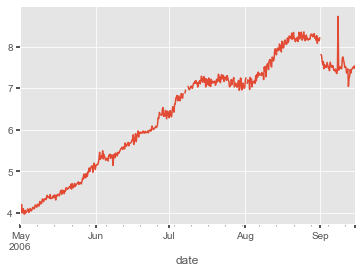

In [28]:
df.resample('6H').median()['2019p'].plot()

In [29]:
(df.resample('6H').median()['2019p']).to_csv('2019p.csv')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
